# Analysis of French first names between 1900 and 2015

USING INSEE FILES AVAILABLE AT: https://www.insee.fr/fr/statistiques/2540004#consulter

## Content:

0. Import and explore the dataset
1. Most common names in 2015
2. Evolution of some specific names throughout the years
3. Evolution of the number of names
4. Evolution of the length of names

## 0. Import and explore the dataset

### Presentation of the features

In [19]:
import pandas as pd
df = pd.read_csv('nat2015.txt', sep = '\t', encoding = 'latin1')
print(df.head())

# Alternatively, can use Excel to convert the txt file into csv format 
# use the tab delimiter and 1252: Western European (Windows) (to properly display the French characters (é, ï, etc.)).

   sexe preusuel annais  nombre
0     1        A   1980     3.0
1     1        A   1998     3.0
2     1        A   XXXX    21.0
3     1    AADEL   1976     5.0
4     1    AADEL   1978     3.0


The file contains four features:
- 'sexe': 1 for male, 2 for female
- 'preusuel': first name
- 'annais': year of birth, between 1900 and 2015
- 'nombre': number of people that year with that first name

INSEE used the following criteria to include a name or not:
1. Between 1900 and 1945, the name has been given at least 20 times to females and/or at least 20 times to males.
2. Between 1946 and 2015, the name has been given at least 20 times to females and/or at least 20 times to males.
3. For a given year, the name has been given at least 3 times to females or males.

Names that do not comply with conditions 1 and 2 are grouped by sex and year of birth under one entry with the value 'PRENOMS_RARES' (rare names) in the 'preusuel' column.

Names that comply with condition 2 but not condition 3 are grouped by sex and name under one entry with the value 'XXXX' in the 'annais' column.

### Change column names

In [20]:
df.columns = ['sex', 'name', 'year', 'number']
print(df.head())

   sex   name  year  number
0    1      A  1980     3.0
1    1      A  1998     3.0
2    1      A  XXXX    21.0
3    1  AADEL  1976     5.0
4    1  AADEL  1978     3.0


### Example with the first name 'A'

In [21]:
dfA = df[(df.name) == 'A']
print(dfA)

   sex name  year  number
0    1    A  1980     3.0
1    1    A  1998     3.0
2    1    A  XXXX    21.0


- The first name 'A' was given 3 times to males in 1980
- The first name 'A' was given 3 times to males in 1998
- The first name 'A' was given 21 times between 1946 and 2015 but never more than 3 times for a given year except in 1980 and 1998

### General characteristics of the dataset

There are 589,411 entries (rows) in the dataset.

The gender ('sex') and number of people ('number') are considered integers.

The names ('name') and year ('year') are considered objects (strings). Years are considered strings because they include 'XXXX' values.

In [22]:
df.info(memory_usage="deep")

# Alternative way to get info:
# print(len(df.index))
# print(df.sex.dtype)
# print(df.name.dtype)
# print(df.year.dtype)
# print(df.number.dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589411 entries, 0 to 589410
Data columns (total 4 columns):
sex       589411 non-null int64
name      589408 non-null object
year      589411 non-null object
number    589411 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 79.9 MB


In [23]:
# Convert gender ('sex') data from integers (1 and 2) to Boolean (False for male and True for female)
d = {1: False, 2: True}
df.sex = df.sex.apply(lambda x: d[x])

print(df.head())
print(df.sex.dtype)

     sex   name  year  number
0  False      A  1980     3.0
1  False      A  1998     3.0
2  False      A  XXXX    21.0
3  False  AADEL  1976     5.0
4  False  AADEL  1978     3.0
bool


In [24]:
# Convert year ('year') data from objects (strings) to integers

# Method 1 - Replace the 'XXXX' values in the 'year' column with 0, then convert to integer 
# Note 1: if replace by NaN, cannot convert to integer 
# 'The lack of NaN rep in integer columns is a pandas "gotcha".'
# http://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int
# Note 2: without using pd.to_numeric, get int32 instead of int16 (which takes more memory)
import numpy as np
df.year = df.year.replace('XXXX', 0)
df.year = df.year.astype('int')
df.year = pd.to_numeric(df.year, errors = 'coerce', downcast = 'integer')

# Method 2 - Change the type of 'year' to numeric (errors = 'coerce' sets invalid entries as NaN)
# Note: Get Float64 not integer
# df.year = pd.to_numeric(df.year, errors = 'coerce', downcast = 'integer')

# Note: When replacing 'XXXX' in the 'year' column by 0 (instead of NaN), need to exclude 0 from the x-axis in the graphs. 

print(df.head())
print(df.year.dtype)

     sex   name  year  number
0  False      A  1980     3.0
1  False      A  1998     3.0
2  False      A     0    21.0
3  False  AADEL  1976     5.0
4  False  AADEL  1978     3.0
int16


In [25]:
print('Maximum value in the "number" column: ' + str(df.number.max()))
print('Output range of int 8: ' + str(np.iinfo("int8").max))
print('Output range of int 16: ' + str(np.iinfo("int16").max))
print('Output range of int 32: ' + str(np.iinfo("int32").max))

# Convert the 'number' column from int64 to int32
df.number = pd.to_numeric(df.number, errors = 'coerce', downcast = 'integer')

Maximum value in the "number" column: 53897.0
Output range of int 8: 127
Output range of int 16: 32767
Output range of int 32: 2147483647


In [26]:
# The memory usage went from 80 MB to 40 MB
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589411 entries, 0 to 589410
Data columns (total 4 columns):
sex       589411 non-null bool
name      589408 non-null object
year      589411 non-null int16
number    589411 non-null int32
dtypes: bool(1), int16(1), int32(1), object(1)
memory usage: 40.5 MB


## 1. Explore the most common names in 2015

In [27]:
# Create a dataframe with only the 2015 names
df2015 = df[(df.year) == 2015]

print('There were ' + str(int(sum(df2015.number))) + ' people born in 2015 in France.')

print('There were ' + str(int(df2015.name.nunique())) + ' different names given in 2015 in France.')

print('There were ' + str(int(len(df2015.index) - df2015.name.nunique())) + ' names given to both males and females in 2015 in France.')

There were 778691 people born in 2015 in France.
There were 12355 different names given in 2015 in France.
There were 376 names given to both males and females in 2015 in France.


In [28]:
# Create a dataframe with only the 2015 male names
df2015M = df[((df.year) == 2015) & ((df.sex) == False)]
print(df2015M.head())
print('There were ' + str(len(df2015M.index)) + ' different male names given in 2015 in France.')

# Note: Creating df2015M as df2015M = df2015[(df.sex) == False] created the following User Warning:
# 'Boolean Series key will be reindexed to match DataFrame index.'

       sex    name  year  number
32   False   AADIL  2015       6
87   False   AARON  2015    2159
101  False  AARONE  2015       8
111  False  AARONN  2015       8
116  False  AAROUN  2015       4
There were 5948 different male names given in 2015 in France.


In [29]:
# Create a dataframe with only the 2015 female names
df2015F = df[((df.year) == 2015) & ((df.sex) == 1)]
print(df2015F.head())
print('There were ' + str(len(df2015F.index)) + ' different female names given in 2015 in France.')

         sex     name  year  number
268089  True   AALIYA  2015       9
268108  True  AALIYAH  2015     187
268123  True    AALYA  2015       7
268140  True   AALYAH  2015      21
268170  True    ABBIE  2015      16
There were 6783 different female names given in 2015 in France.


In [30]:
# Sort the dataframes and show the most common 20 names
df2015M = df2015M.sort_values(by='number', ascending=False)
df2015F = df2015F.sort_values(by='number', ascending=False)
print(df2015M.head(10))
print(df2015F.head(10))

          sex            name  year  number
267677  False  _PRENOMS_RARES  2015   26758
86800   False         GABRIEL  2015    5640
136284  False           JULES  2015    5147
156532  False           LUCAS  2015    5011
154454  False           LOUIS  2015    4748
6418    False            ADAM  2015    4526
107522  False            HUGO  2015    4349
159457  False             LÉO  2015    4303
208769  False         RAPHAËL  2015    4196
74146   False           ETHAN  2015    4135
         sex            name  year  number
588636  True  _PRENOMS_RARES  2015   29349
442241  True          LOUISE  2015    4540
354188  True            EMMA  2015    4399
400974  True            JADE  2015    4292
323634  True           CHLOÉ  2015    3598
458372  True           MANON  2015    3530
276692  True           ALICE  2015    3336
435420  True            LINA  2015    3191
448550  True             LÉA  2015    3100
439018  True            LOLA  2015    3061


## 2. See the evolution of some specific names throughout the years

### My first name: Kim!

In [31]:
dfKIM = df[(df.name) == 'KIM']
print('There have been ' + str(sum(dfKIM.number)) + ' people named Kim in France between 1900 and 2015.')

dfKIM_M = df[((df.name) == 'KIM') & ((df.sex) == False)]
print('including ' + str(sum(dfKIM_M.number)) + ' males')

dfKIM_F = df[((df.name) == 'KIM') & ((df.sex) == True)]
print('and ' + str(sum(dfKIM_F.number)) + ' females.')

There have been 5932 people named Kim in France between 1900 and 2015.
including 1165 males
and 4767 females.


There were almost no Kim at all in France before 1952 (males) and 1954 (females).


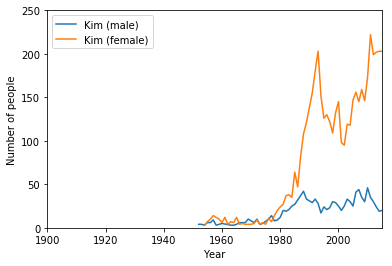

In [32]:
print('There were almost no Kim at all in France before 1952 (males) and 1954 (females).')

dfKIM_M = df[((df.name) == 'KIM') & ((df.sex) == False) & ((df.year) != 0)]
dfKIM_F = df[((df.name) == 'KIM') & ((df.sex) == True) & ((df.year) != 0)]

import matplotlib.pyplot as plt

plt.plot(dfKIM_M.year, dfKIM_M.number, label = 'Kim (male)')
plt.plot(dfKIM_F.year, dfKIM_F.number, label = 'Kim (female)')
plt.xlim([1900,2015])
plt.ylim([0,250])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.show()

#### In 1986, the year I was born:

In [33]:
dfKIM_F86 = dfKIM_F[(dfKIM_F.year) == 1986]
print('There were ' + str(sum(dfKIM_F86.number)) + ' females named Kim in France in 1986')

dfKIM_M86 = dfKIM_M[(dfKIM_M.year) == 1986]
print('There were ' + str(sum(dfKIM_M86.number)) + ' males named Kim in France in 1986')

There were 47 females named Kim in France in 1986
There were 32 males named Kim in France in 1986


In [34]:
df1986 = df[(df.year) == 1986]

print(str(sum(df1986.number)) + ' people were born in 1986 in France.')

print('Only ' + str(round((sum(dfKIM_F86.number) + sum(dfKIM_M86.number)) / sum(df1986.number)*100, 2)) + 
      '% of them were named Kim!')

795198 people were born in 1986 in France.
Only 0.01% of them were named Kim!


### My husband's name: David

In [35]:
dfDAVID = df[(df.name) == 'DAVID']
print('There have been ' + str(sum(dfDAVID.number)) + 
      ' people named David in France between 1900 and 2015 (including a couple of females).')

dfDAVID_86 = df[((df.name) == 'DAVID') & ((df.year) == 1986)]
print('There were ' + str(sum(dfDAVID_86.number)) + ' people named David in France in 1986')

There have been 310421 people named David in France between 1900 and 2015 (including a couple of females).
There were 5426 people named David in France in 1986


In [36]:
df1986M = df[((df.year) == 1986) & ((df.sex) == False)]

print(str(sum(df1986M.number)) + ' males were born in 1986 in France.')

print(str(round(sum(dfDAVID_86.number) / sum(df1986M.number)*100, 2)) + '% of them were named David.')

407362 males were born in 1986 in France.
1.33% of them were named David.


In [37]:
# By comparison, the most common male name in 1986 was Julien with 15,332 people, 3.76% of all males born that year
df1986M = df1986M.sort_values(by = 'number', ascending = False)

print(df1986M.head(15))
print(15332/407362*100)

          sex            name  year  number
136562  False          JULIEN  1986   15332
189369  False         NICOLAS  1986   12504
96138   False       GUILLAUME  1986    9087
12919   False       ALEXANDRE  1986    8743
238197  False       SÉBASTIEN  1986    8157
243248  False          THOMAS  1986    8140
267648  False  _PRENOMS_RARES  1986    8111
215542  False          ROMAIN  1986    8026
21918   False         ANTHONY  1986    7984
132493  False        JONATHAN  1986    7620
127805  False          JEREMY  1986    7082
169668  False         MATHIEU  1986    6929
53105   False          DAMIEN  1986    6313
251989  False         VINCENT  1986    5944
55070   False           DAVID  1986    5426
3.763728575566695


### Creating a function to get statistics and graphs on a given first name and birth year

In [38]:
def name_stats(name, year):
    name = name.upper()
    
    # General statistics
    print('Number of ' + str(name).title() + ' in France between 1900 and 2015:')
    dfNAME = df[(df.name) == name]
    print('Total: ' + str(sum(dfNAME.number)))
    dfNAME_M = df[((df.name) == name) & ((df.sex) == 0)]
    print('Male ' + str(sum(dfNAME_M.number)))
    dfNAME_F = df[((df.name) == name) & ((df.sex) == 1)]
    print('Female ' + str(sum(dfNAME_F.number)))
    
    # Statistics in given year
    print('Number of ' + str(name).title() + ' in France in ' + str(year) + ':')
    dfNAME_yr = df[((df.name) == name) & ((df.year) == year)]
    print('Total: ' + str(sum(dfNAME_yr.number)))
    dfNAME_Myr = df[((df.name) == name) & ((df.sex) == 0) & ((df.year) == year)]
    print('Males: ' + str(sum(dfNAME_Myr.number)))
    dfNAME_Fyr = df[((df.name) == name) & ((df.sex) == 1) & ((df.year) == year)]
    print('Females: ' + str(sum(dfNAME_Fyr.number)))
        
    # Graph
    plt.plot(dfNAME_M.year, dfNAME_M.number, label = str(name) + ' (male)')
    plt.xlim([1900,2015])
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Number of people')
    plt.plot(dfNAME_F.year, dfNAME_F.number, label = str(name) + ' (female)')
    plt.xlim([1900,2015])
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Number of people')
    plt.show()
    
    # Most common names in given year
    df_yrM = df[((df.year) == year) & ((df.sex) == 0)]
    df_yrF = df[((df.year) == year) & ((df.sex) == 1)]
    df_yrM = df_yrM.sort_values(by='number', ascending=False)
    df_yrF = df_yrF.sort_values(by='number', ascending=False)
    print('Top 5 male names in ' + str(year))
    print(df_yrM[['name', 'number']].head(5))
    print('Top 5 female names in ' + str(year))
    print(df_yrF[['name', 'number']].head(5))
    
    # Rank
    df_yrM['rank'] = df_yrM['number'].rank(ascending=0)
    print('In ' + str(year) + ', '+ str(name) + ' was the ' + 
          str(df_yrM.loc[df_yrM['name'] == name]['rank'].values) + 'th most popular male name.')
  
    df_yrF['rank'] = df_yrF['number'].rank(ascending=0)
    print('In ' + str(year) + ', '+ str(name) + ' was the ' + 
          str(df_yrF.loc[df_yrF['name'] == name]['rank'].values) + 'th most popular female name.')  


Number of Laura in France between 1900 and 2015:
Total: 145488
Male 0
Female 145488
Number of Laura in France in 1994:
Total: 7937
Males: 0
Females: 7937


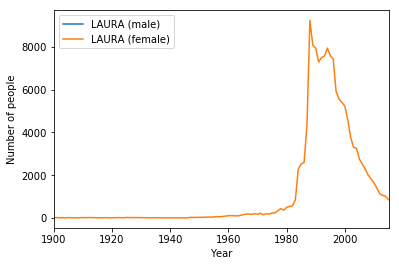

Top 5 male names in 1994
                  name  number
267656  _PRENOMS_RARES   10063
142600           KEVIN    9906
189377         NICOLAS    9250
12927        ALEXANDRE    8829
243256          THOMAS    8149
Top 5 female names in 1994
                  name  number
588615  _PRENOMS_RARES   10218
425888           LAURA    7937
458351           MANON    7486
462543           MARIE    7231
313867         CAMILLE    7020
In 1994, LAURA was the []th most popular male name.
In 1994, LAURA was the [ 2.]th most popular female name.


In [39]:
# Testing the function
name_stats('Laura', 1994)

Number of Anna in France between 1900 and 2015:
Total: 104524
Male 0
Female 104524
Number of Anna in France in 2001:
Total: 1271
Males: 0
Females: 1271


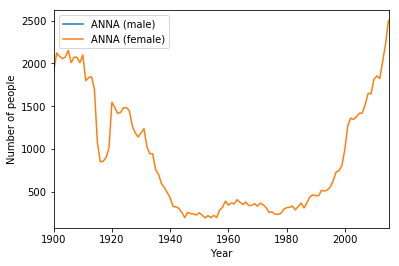

Top 5 male names in 2001
                  name  number
267663  _PRENOMS_RARES   13987
243263          THOMAS   10104
156518           LUCAS    9038
243658            THÉO    8864
107508            HUGO    7050
Top 5 female names in 2001
                  name  number
588622  _PRENOMS_RARES   15340
448536             LÉA   10725
458358           MANON    7593
323620           CHLOÉ    7040
313874         CAMILLE    6588
In 2001, ANNA was the []th most popular male name.
In 2001, ANNA was the [ 60.]th most popular female name.


In [40]:
name_stats('Anna', 2001)

Number of Elisabeth in France between 1900 and 2015:
Total: 161195
Male 148
Female 161047
Number of Elisabeth in France in 1960:
Total: 4117
Males: 4
Females: 4113


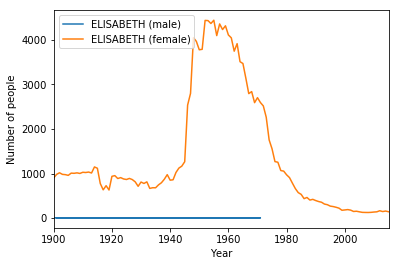

Top 5 male names in 1960
            name  number
201363  PHILIPPE   24761
198704   PATRICK   18522
119080      JEAN   17948
198210    PASCAL   17782
10564      ALAIN   15274
Top 5 female names in 1960
             name  number
317507  CATHERINE   18049
563797     SYLVIE   17656
324800  CHRISTINE   15152
462509      MARIE   15138
311555   BRIGITTE   14615
In 1960, ELISABETH was the [ 1202.]th most popular male name.
In 1960, ELISABETH was the [ 24.]th most popular female name.


In [41]:
name_stats('Elisabeth', 1960)

Number of Christian in France between 1900 and 2015:
Total: 405293
Male 405165
Female 128
Number of Christian in France in 1951:
Total: 16682
Males: 16678
Females: 4


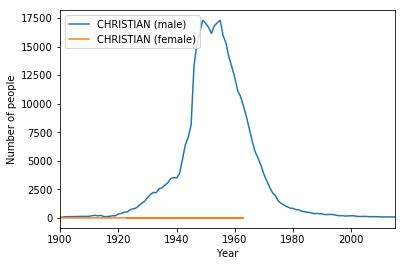

Top 5 male names in 1951
             name  number
119071       JEAN   35593
176647     MICHEL   25140
10555       ALAIN   23032
35580     BERNARD   16987
47097   CHRISTIAN   16678
Top 5 female names in 1951
             name  number
462500      MARIE   25312
478283    MARTINE   19008
371390  FRANÇOISE   13652
493626    MONIQUE   12798
507418     NICOLE   11537
In 1951, CHRISTIAN was the [ 5.]th most popular male name.
In 1951, CHRISTIAN was the [ 1239.5]th most popular female name.


In [42]:
name_stats('Christian', 1951)

Number of David in France between 1900 and 2015:
Total: 310421
Male 310289
Female 132
Number of David in France in 1986:
Total: 5426
Males: 5426
Females: 0


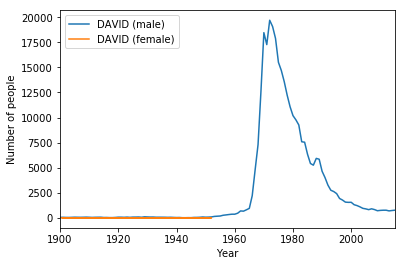

Top 5 male names in 1986
             name  number
136562     JULIEN   15332
189369    NICOLAS   12504
96138   GUILLAUME    9087
12919   ALEXANDRE    8743
238197  SÉBASTIEN    8157
Top 5 female names in 1986
             name  number
302540    AURÉLIE   11320
353631     EMILIE    9320
411595      JULIE    8970
350499     ELODIE    8527
560205  STÉPHANIE    8429
In 1986, DAVID was the [ 15.]th most popular male name.
In 1986, DAVID was the []th most popular female name.


In [43]:
name_stats('david', 1986)

Number of Bastien in France between 1900 and 2015:
Total: 52257
Male 52257
Female 0
Number of Bastien in France in 1981:
Total: 449
Males: 449
Females: 0


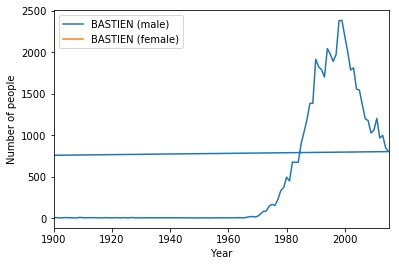

Top 5 male names in 1981
             name  number
189364    NICOLAS   20823
136557     JULIEN   15058
238192  SÉBASTIEN   14657
55065       DAVID    9776
96133   GUILLAUME    8839
Top 5 female names in 1981
             name  number
333618     CÉLINE   12506
302535    AURÉLIE   12364
353626     EMILIE   10821
577440   VIRGINIE    8893
560200  STÉPHANIE    8523
In 1981, BASTIEN was the [ 139.]th most popular male name.
In 1981, BASTIEN was the []th most popular female name.


In [44]:
name_stats('Bastien', 1981)

## 3. Evolution of the number of names

### Number of births per year
We can easily notice on the graph:
- the dip in the number of births during WWI, from 548,000 in 1913 down to 283,000 in 1916 (-48% in 3 years)!
- the dip in the number of births during WWII
- the baby boom after WWII, from 592,000 in 1945 up to 893,000 in 1947 (+51% in 2 years)!

Number of births in 1913: 548028
Number of births in 1916: 282807
Number of births in 1945: 591774
Number of births in 1947: 892941


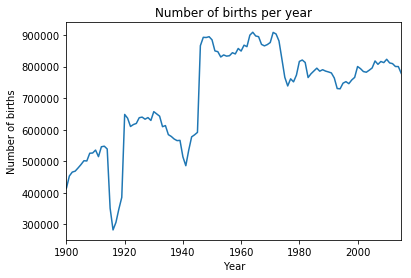

In [45]:
annual_births = df.groupby(['year'])['number'].sum()

for year in sorted({1913, 1916, 1945, 1947}):
    print('Number of births in ' + str(year) + ': ' + str(annual_births[year]))

annual_births.plot(kind='line', title = 'Number of births per year')
plt.xlim([1900,2015])
plt.xlabel('Year')
plt.ylabel('Number of births')
plt.show()

### Number of different names per year

The number of unique names per year has increased from less than 1,600 in 1900, to 6000+ in 1986 and 12,000+ in 2015.

Number of unique names in 1900: 1594
Number of unique names in 1986: 6391
Number of unique names in 2015: 12355


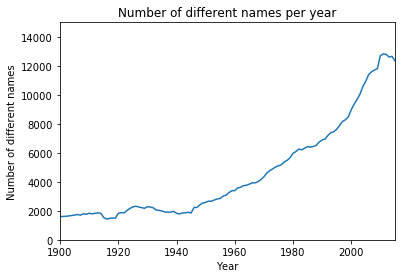

In [46]:
annual_names = df.groupby(['year'])['name'].nunique()

for year in sorted({1900, 1986, 2015}):
    print('Number of unique names in ' + str(year) + ': ' + str(annual_names[year]))

annual_names.plot(kind='line', title = 'Number of different names per year')
plt.xlim([1900,2015])
plt.ylim([0,15000])
plt.xlabel('Year')
plt.ylabel('Number of different names')
plt.show()

### Ratio of different names per number of births

There is a sharp increase in the number of unique names compared to the increase in the number of births, starting around 1950.

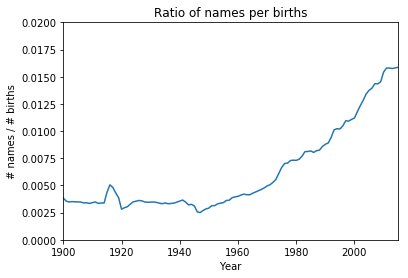

In [47]:
ratio = annual_names / annual_births

ratio.plot(kind='line', title = 'Ratio of names per births')
plt.xlim([1900,2015])
plt.ylim([0,0.02])
plt.xlabel('Year')
plt.ylabel('# names / # births')
plt.show()

### Rare names

We can also notice how the number of people with rare names increased from 2,980 in 1900 (0.01% of births) to 56,107 in 2015 (0.07% of births).

Rare names are names with less than 20 people between 1900 and 1945 (condition 1), and less than 20 people between 1946 and 2015 (condition 2).

Rare names in 1900: 2980 people (0.01% of births)
Rare names in 2015: 56107 people (0.07% of births)


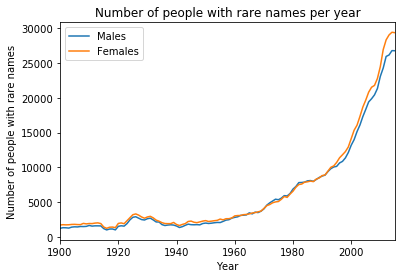

In [48]:
rare_names = df[(df.name) == '_PRENOMS_RARES']
rare_names_M = df[((df.name) == '_PRENOMS_RARES') & ((df.sex) == 0)]
rare_names_F = df[((df.name) == '_PRENOMS_RARES') & ((df.sex) == 1)]

for year in sorted({1900, 2015}):
    nb = sum(rare_names[((rare_names.year) == year)].number)
    ratio = nb / sum(df[((df.year) == year)].number)
    print('Rare names in ' + str(year) + ': ' + 
          str(nb) + ' people ' +
          '(' + str(round(ratio, 2)) + '% of births' + ')')

plt.plot(rare_names_M.year, rare_names_M.number, label = 'Males')
plt.plot(rare_names_F.year, rare_names_F.number, label = 'Females')
plt.xlim([1900,2015])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of people with rare names')
plt.title('Number of people with rare names per year')
plt.show()

## 4. Evolution of the length of names

Inspired by INSEE analysis: 

'L'évolution des prénoms en région Centre : plus courts et plus variés que par le passé'

('The evolution of first names in the Centre region of France: shorter and more diverse than in the past'

https://www.insee.fr/fr/statistiques/1292923

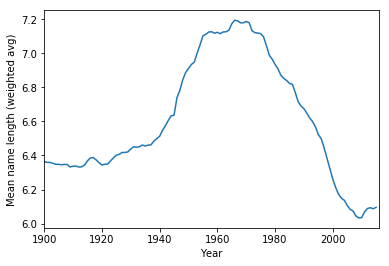

In [49]:
# Calculate length of names per year weighted by the number of births
names_length = {}
for i in range(len(df.index)):
    if df.iloc[i]['year'] in names_length:
        names_length[df.iloc[i]['year']] += len(str(df.iloc[i]['name'])) * df.iloc[i]['number']
    else:
        names_length[df.iloc[i]['year']] = len(str(df.iloc[i]['name'])) * df.iloc[i]['number']

# Create a dataframe from the dictionnary
length = pd.DataFrame.from_dict(names_length, orient='index')
length['year'] = length.index
length = length.rename(columns = {0:'length'})

# Sort rows by increasing years
length = length.sort_values(by='year')

# Reorder columns
length = length[['year', 'length']] 

# Add a column with number of births per year
length['births'] = df.groupby(['year'])['number'].sum()

# Add a column with mean length of names per year (mean weighted by number of births)
length['avg_length'] = length['length'] / length['births']

# Create graph
plt.plot(length.year, length.avg_length)
plt.xlabel('Year')
plt.ylabel('Mean name length (weighted avg)')
plt.xlim([1900,2016])
plt.show()

In [52]:
# Can correlate with the top names in 1900, 1970 and 2010
def top_names(year):
    dfyrM = df[((df.year) == year) & ((df.sex) == 0)]
    dfyrM = dfyrM.sort_values(by = 'number', ascending = False)
    print(dfyrM.head(3))
    
    dfyrF = df[((df.year) == year) & ((df.sex) == 1)]
    dfyrF = dfyrF.sort_values(by = 'number', ascending = False)
    print(dfyrF.head(3))

top_names(1900)
top_names(1970)
top_names(2010)

          sex    name  year  number
119020  False    JEAN  1900   14108
154339  False   LOUIS  1900    9057
201834  False  PIERRE  1900    7460
         sex        name  year  number
462449  True       MARIE  1900   48727
403785  True      JEANNE  1900   13983
460374  True  MARGUERITE  1900    8059
          sex        name  year  number
47397   False  CHRISTOPHE  1970   21856
235971  False    STÉPHANE  1970   21796
148072  False     LAURENT  1970   19957
         sex      name  year  number
503215  True  NATHALIE  1970   26217
574404  True   VALÉRIE  1970   19390
542332  True  SANDRINE  1970   18056
          sex            name  year  number
267672  False  _PRENOMS_RARES  2010   23075
186808  False          NATHAN  2010    7034
156527  False           LUCAS  2010    6922
         sex            name  year  number
588631  True  _PRENOMS_RARES  2010   24482
354183  True            EMMA  2010    6401
458367  True           MANON  2010    5044


TO DO LIST:
- Convert 'years' into integer not float - DONE better to have missing values though, maybe create 2 separate dataframes?
- Address the Warning User messages - DONE (that was linked to how I created sub dataframes)
- Create function to show stats on a given name and birth year - DONE BUT CAN ADD MORE
- Study the evolution of the length of names - OK BUT SLOW (6 min)
- Create function to 'predict' birth year based on the name? Would only work for names with peaks
- 